# EDA (Exploratory Data Analysis)
데이터를 다각도에서 탐색하면서 <b>데이터의 이해도를 높이는 과정</b>입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

기존에는 `가설`을 설정하고 가설을 `검증`하는 형태로 데이터 분석을 했다면, EDA에서는 `가설설정` -> `데이터분석` -> `가설수정` -> `데이터분석` 과정을 반복해서 인사이트를 발견합니다. 

- 분석의 목적 확인
- 데이터 타입 확인하기
- 결측값 확인하기
- 데이터 분포 확인
- 관계 분석하기

----

다음의 예제와 함께 EDA를 이해해 봅시다.
<div class="alert alert-block alert-success">
금융권에 재직중인 직장인에게 광고를 집행해서 서점의 매출액을 높이고 싶습니다. 어떤 책의 광고를 해야 할까요?
</div>  

서점의 데이터베이스가 다음과 같이 저장돼 있습니다.

In [1]:
import pandas as pd

data = {
    "판매량" : [10, 4, 4, 4, 4],
    "장르"   : ["경제학", "만화", "만화", "만화", "만화"]
}
index = [
    '돈의 심리학', '드래곤볼', '아톰', '은하철도', '원피스'
]

df = pd.DataFrame(data, index)
df

,판매량,장르
돈의 심리학,10,경제학
드래곤볼,4,만화
아톰,4,만화
은하철도,4,만화
원피스,4,만화


###### 분석 방법 1
- `가설` : 금융권에 재직중이기 때문에 경제 관련 도서에 관심이 높을 것이다.  
- `검증` : 서점 Database에서 금융권 재직자의 경제 베스트 셀러 판매량을 확인한다.  

In [2]:
df['판매량'].idxmax()

'돈의 심리학'

<div class="alert alert-block alert-danger">
판매량이 많기 때문에 경제학 베스트 셀러의 광고를 집행한다.
</div>

###### 분석 방법 2
- `가설` : 금융권에 재직중이기 때문에 경제 관련 도서에 관심이 높을 것이다.  
- `데이터분석`
데이터 분포를 확인해 본다.

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [4]:
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

os = platform.system()
if os == "Darwin":    
    plt.rc('font', family="AppleGothic")
elif os == "Linux":
    plt.rc('font', family='NanumBarunGothic')
else:    
    plt.rc('font', family="Malgun Gothic")
    plt.rcParams['axes.unicode_minus'] = False

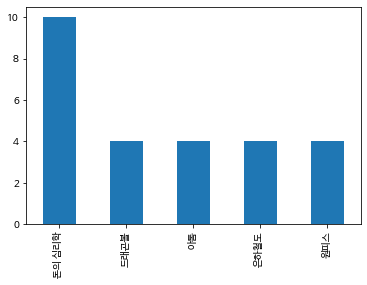

In [5]:
df['판매량'].plot.bar()

In [6]:
df.groupby('장르').sum()

,판매량
장르,
경제학,10
만화,16


<div class="alert alert-block alert-danger">
만화책, 여가생활과 관련한 도서 광고를 집행한다. 
</div>

----

## 타이타닉 생존률 분석

<div class="alert alert-block alert-success">
    <b>목표</b> : 생존률과 관련 있는 Factor를 찾는다. 
</div>

타이타닉 CSV 데이터를 데이터프레임으로 읽어옵니다. 
- `train.csv`

In [7]:
import pandas as pd

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
base_path="/content/drive/MyDrive/Colab Notebooks/이어드림강의/2022-04-20(유종훈)/3.EDA/"

df = pd.read_csv(base_path+"train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- `SibSp` : 형제 자매와 배우자
- `Parch` : 부모와 자식
- `Cabin` : 선실 번호  
- `Embarked` : 탑승 항구(C = Cherbourg, Q = Queenstown, S = Southampton)

단순히 상관관계만을 참고한다면 성별과 클래스가 생존률과 높은 관계가 있다고 결론 내릴 수 있습니다.
- `Survived` 행에서 높은 값을 갖는 두 변수

In [10]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 데이터 타입과 결측값 확인하기

결측값 개수 출력하기

In [15]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

결측비율 출력하기

In [17]:
df.isna().sum() / len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

나이는 평균으로 채우기
- 전체 평균이 정답인가?
- Pclass가 같은 사람들의 평균이 좋지 않을까?

In [20]:
cond = df["Age"].isna()
df.loc[cond,"Age"] = df["Age"].mean()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


불필요한 컬럼 제거하기

In [ ]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
df = df[  ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']  ]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## 데이터 분포 확인하기

중복되지 않는 값 

In [23]:
df['Survived'].unique()

array([0, 1])

In [24]:
df['Survived'].nunique()

2

###### 성별
생존률의 차이가 있지 않을까?

In [31]:
import numpy as np

how = {
    "Survived" : np.mean
}
df.groupby('Sex').agg( how )


,Survived
Sex,
female,0.742038
male,0.188908


성별은 생존률에 영향을 미친다.  

----

분석하기 좋게 남자를 0, 여자를 1로 변경해 봅시다.

`get_dummies` 함수는 0과 1로 이루어진 가변수를 만듭니다. 
- One-hot encoding이라고도 부릅니다.

In [25]:
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


하나의 예제를 더 확인해 보면서 `get_dummies`를 익혀봅시다.

In [26]:
data = {
    "항목" : ["A", "B", "C", "A"],
    "가격" : [100, 200, 150, 300]
}
t = pd.DataFrame(data)
t

,항목,가격
0,A,100
1,B,200
2,C,150
3,A,300


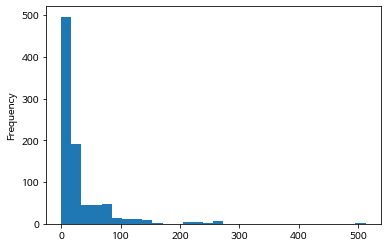

In [49]:
df["Fare"].plot.hist(bins=30)

In [54]:
cond =df["Fare"]<100

df_ = df.loc[cond, "Fare"]

df_.describe()

count    838.000000
mean      22.411942
std       20.827218
min        0.000000
25%        7.895800
50%       13.000000
75%       27.720800
max       93.500000
Name: Fare, dtype: float64

###### 형제/자매와 와이프
보호자인 경우 생존률이 높지 않을까?

In [32]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

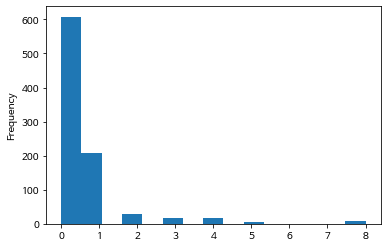

In [35]:
df["SibSp"].plot.hist(bins=15)

0을 제외하고 분포 확인하기

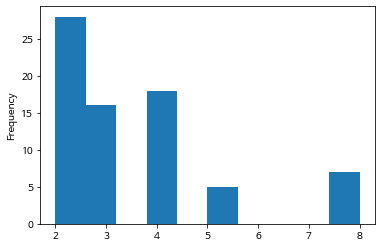

In [42]:
cond = df["SibSp"] >1
df.loc[ cond, "SibSp"].plot.hist()

In [44]:
# 분류를 한다.
# - 없는사람
# - 1명
# - 2명 이상

def func(x):
    if x ==0:
        return "없음"
    elif x==1:
        return "1명"
    else:
        return "많음"

df["보호자"] = df["SibSp"].map(func)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,보호자
0,0,3,male,22.0,1,0,7.2500,S,1명
1,1,1,female,38.0,1,0,71.2833,C,1명
2,1,3,female,26.0,0,0,7.9250,S,없음
3,1,1,female,35.0,1,0,53.1000,S,1명
4,0,3,male,35.0,0,0,8.0500,S,없음


In [45]:
df.groupby("보호자").agg(how)

,Survived
보호자,
1명,0.535885
많음,0.270270
없음,0.345395


In [46]:
df.groupby(["보호자","Sex"]).agg(how)

Survived
보호자 Sex             
1명  female  0.754717
    male    0.310680
많음  female  0.470588
    male    0.100000
없음  female  0.787356
    male    0.168203

시각화를 하는 `seaborn` 모듈
- https://seaborn.pydata.org/tutorial.html#

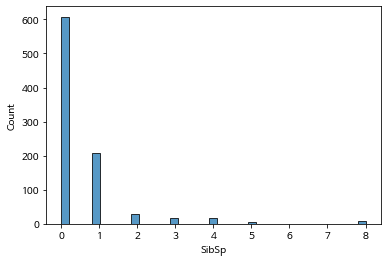

In [28]:
import seaborn as sns
sns.histplot(x='SibSp', data=df)

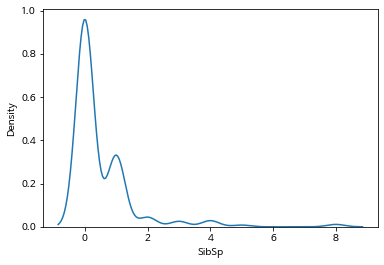

In [29]:
sns.kdeplot(x='SibSp', data=df)

평균은?

형제/자매 및 와이프가 있는 경우의 평균

요약 정보 확인하기

없음/보통/많음으로 구분하기

구분에 따른 생존률 분석

###### 부모 및 아이

In [30]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

보호자는 생존률이 높지 않을까?

`없음`/`보통`/`많음`으로 분류하기

## 나이 

나이 분포 출력하기

<AxesSubplot:ylabel='Frequency'>

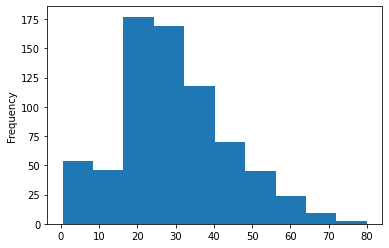

`유아`/`청소년`/`성인`/`노약자` 분류하기

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SibSp1,Parch1,Age1
0,0,3,0,22.0,1,0,7.2500,S,보통,없음,성인
1,1,1,1,38.0,1,0,71.2833,C,보통,없음,성인
2,1,3,1,26.0,0,0,7.9250,S,없음,없음,성인
3,1,1,1,35.0,1,0,53.1000,S,보통,없음,성인
4,0,3,0,35.0,0,0,8.0500,S,없음,없음,성인


,Survived
Age1,
노약자,0.314741
성인,0.386555
유아,0.612903
청소년,0.401961


## 다변수 분석

여자 보호자의 생존률은 더 높지 않을까?
- 성별이 여자이면서 `Parch`가 존재

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SibSp1,Parch1,Age1
0,0,3,0,22.0,1,0,7.2500,S,보통,없음,성인
1,1,1,1,38.0,1,0,71.2833,C,보통,없음,성인
2,1,3,1,26.0,0,0,7.9250,S,없음,없음,성인
3,1,1,1,35.0,1,0,53.1000,S,보통,없음,성인
4,0,3,0,35.0,0,0,8.0500,S,없음,없음,성인


Survived
Sex Parch1          
0   많음      0.000000
    보통      0.325843
    없음      0.165289
1   많음      0.363636
    보통      0.697248
    없음      0.788660

Survived
Sex SibSp1          
0   많음      0.100000
    보통      0.310680
    없음      0.168203
1   많음      0.470588
    보통      0.754717
    없음      0.787356

Survived
Sex Parch1 SibSp1          
0   많음     보통      0.000000
    보통     많음      0.074074
           보통      0.461538
           없음      0.391304
    없음     많음      0.153846
           보통      0.233333
           없음      0.155718
1   많음     많음      1.000000
           보통      0.333333
           없음      0.250000
    보통     많음      0.392857
           보통      0.756757
           없음      0.840909
    없음     많음      0.800000
           보통      0.793651
           없음      0.785714

Survived
Sex Age1          
0   노약자   0.130682
    성인    0.192308
    유아    0.593750
    청소년   0.122807
1   노약자   0.746667
    성인    0.756098
    유아    0.633333
    청소년   0.755556

In [ ]:
pd.get_dummies(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,SibSp1_많음,SibSp1_보통,SibSp1_없음,Parch1_많음,Parch1_보통,Parch1_없음,Age1_노약자,Age1_성인,Age1_유아,Age1_청소년
0,0,3,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,0,1,0,1,0,0
1,1,1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0,0,1,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,1,0,1,0,0
3,1,1,1,35.0,1,0,53.1000,0,0,1,0,1,0,0,0,1,0,1,0,0
4,0,3,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,0,1,0,0,1,0,0,1,0,1,0,0
887,1,1,1,19.0,0,0,30.0000,0,0,1,0,0,1,0,0,1,0,0,0,1
888,0,3,1,NaN,1,2,23.4500,0,0,1,0,1,0,0,1,0,1,0,0,0
889,1,1,0,26.0,0,0,30.0000,1,0,0,0,0,1,0,0,1,0,1,0,0
